In [1]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 279.3 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 297.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 504.4 kB/s eta 0:00:01
   ---------------- --------------------- 133.1/300.2 kB 522.9 kB/s eta 0:00:01
   ---------------- --------------------- 133.1/300.2 kB 522.9 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/300.2 kB 535.8 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/300.2 kB 597.3 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/300.2 kB 558.1 kB/s eta 0:00:01
   

In [2]:
!pip install gensim

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/59.6 kB ? eta -:--:--
   -------------------- ------------------- 30.7/59.6 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 59.6/59.6 kB 1.0 MB/s eta 0:00:00
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20451 sha256=ec4f1e17f1ba65addec8f39d96ff8f1b031551d4ecc80bcc71fd44415465f92f
  Stored in directory: c:\users\sivan\appdata\local\pip\cache\wheels\69\f5\e5\18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3517 sha256=e5cb2a6b1155151eab7fde46a77ad185dc5f77ac6007159bec423c9398f85868
  Stored in directory: c:\users\sivan\appdata\local\pip\cache\wheels\9d\ff\2f\afe4cd56f47de147407705626517d68bea0f3b74eb1fb168e6
Successfu

In [4]:
!pip install jupyterthemes


   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.0 MB 353.1 kB/s eta 0:00:20
    --------------------------------------- 0.1/7.0 MB 423.5 kB/s eta 0:00:17
   - -------------------------------------- 0.2/7.0 MB 588.9 kB/s eta 0:00:12
   - -------------------------------------- 0.3/7.0 MB 737.3 kB/s eta 0:00:10
   -- ------------------------------------- 0.4/7.0 MB 946.4 kB/s eta 0:00:07
   -- ------------------------------------- 0.5/7.0 MB 1.0 MB/s eta 0:00:07
   --- ------------------------------------ 0.6/7.0 MB 1.1 MB/s eta 0:00:06
   --- ------------------------------------ 0.6/7.0 MB 1.1 MB/s eta 0:00:06
   ---- -----------------------------

In [5]:
# Importing modules and libraries.
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot

# For x and y-axis labels.
jtplot.style(theme='chesterish', context='notebook', ticks=True, grid=False) 


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sivan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sivan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sivan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Importing the ISOT Fake News Detection Dataset.

In [6]:
# Loading the dataset; divided into 2 sets as fake news and true news.
df_true = pd.read_csv("C:\\Users\\sivan\\Desktop\\fake news detection\\True.csv")
df_fake = pd.read_csv("C:\\Users\\sivan\\Desktop\\fake news detection\\Fake.csv")

In [7]:
print("Real news count: ", df_true.shape[0])
print("Fake news count: ", df_fake.shape[0])

print("\nNull count in real news: ", df_true.isna().sum().sum())
print("Null count in fake news: ", df_fake.isna().sum().sum())

Real news count:  21417
Fake news count:  23481

Null count in real news:  0
Null count in fake news:  0


In [14]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [15]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [16]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [17]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


## Performing Data Analysis.

In [18]:
# Adding a target class column to indicate whether the news is real or fake.
df_true['isfake'] = 0
df_true.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [19]:
df_fake['isfake'] = 1
df_fake.head()

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [20]:
# Concatenating real and fake news.
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [21]:
df.drop(columns = ['date'], inplace = True)

In [22]:
# Combining title and text together.
df['original'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,isfake,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...


In [23]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

## Performing Data Pre-Processing.

In [24]:
# Downloading stopwords ('the', 'is', 'and' etc).
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sivan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
# Obtaining additional stopwords from NLTK library.
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [26]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
# Function for data pre-processing and cleaning.
def preprocess(text):
    # Initializing the lemmatization algorithm.
    lemmatizer = WordNetLemmatizer()
    
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token.isalpha() and len(token) > 2 and token not in gensim.parsing.preprocessing.STOPWORDS and token not in stop_words:
            
            # Replacing characters that are not between a to z or A to Z with whitespace.
            token = re.sub(r'[^a-zA-Z]', ' ', token)
            
            # Converting all characters into lowercase ones.
            token = token.lower()
            
            # Removing inflectional morphemes from their token stem.
            token = lemmatizer.lemmatize(token)
            result.append(token)
            
    return result

In [28]:
# Applying the function to the dataframe.
df['clean'] = df['original'].apply(preprocess)

In [29]:
# Cropping titles into sentences with 42 max length.
max_title_length = 42
df['clean'] = df['clean'].apply(lambda x: x[:max_title_length])

In [30]:
df

,title,text,subject,isfake,original,clean
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, loom, republican, flip, fiscal..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruit, monda..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, let, mueller, jo..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...,"[fbi, russia, probe, helped, australian, diplo..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...,"[trump, want, postal, service, charge, amazon,..."
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,1,McPain: John McCain Furious That Iran Treated ...,"[mcpain, john, mccain, furious, iran, treated,..."
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,1,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,"[justice, yahoo, settle, mail, privacy, class,..."
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,1,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,"[sunnistan, allied, safe, zone, plan, territor..."
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,1,How to Blow $700 Million: Al Jazeera America F...,"[blow, million, jazeera, america, finally, cal..."


In [31]:
# Showing the original news.
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [32]:
# Showing the cleaned up news, after removing all the stopwords.
print(df['clean'][0])

['budget', 'fight', 'loom', 'republican', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'pay', 'tax', 'cut', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'way', 'republican', 'representative', 'mark', 'meadow', 'speaking', 'cbs', 'face', 'nation']


In [33]:
# Obtaining the total words present in the dataset.
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [34]:
list_of_words

['budget',
 'fight',
 'loom',
 'republican',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'pay',
 'tax',
 'cut',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'way',
 'republican',
 'representative',
 'mark',
 'meadow',
 'speaking',
 'cbs',
 'face',
 'nation',
 'military',
 'accept',
 'transgender',
 'recruit',
 'monday',
 'pentagon',
 'washington',
 'reuters',
 'transgender',
 'people',
 'allowed',
 'time',
 'enlist',
 'military',
 'starting',
 'monday',
 'ordered',
 'federal',
 'court',
 'pentagon',
 'said',
 'friday',
 'president',
 'donald',
 'trump',
 'administration',
 'decided',
 'appeal',
 'ruling',
 'blocked',
 'transgender',
 'ban',
 'federal',
 'appeal',
 'court',
 'washington',
 'virginia',
 'week',
 'rejected',
 'administration',
 'request',
 'hold',
 'senior'

In [35]:
len (list_of_words)

1835620

In [36]:
# Obtaining the total number of unique words.
total_words = len(list(set(list_of_words)))
total_words

38396

In [37]:
# Joining the words into a string.
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

In [38]:
df

,title,text,subject,isfake,original,clean,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, loom, republican, flip, fiscal...",budget fight loom republican flip fiscal scrip...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruit, monda...",military accept transgender recruit monday pen...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, let, mueller, jo...",senior republican senator let mueller job wash...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...,"[fbi, russia, probe, helped, australian, diplo...",fbi russia probe helped australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...,"[trump, want, postal, service, charge, amazon,...",trump want postal service charge amazon shipme...
...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,1,McPain: John McCain Furious That Iran Treated ...,"[mcpain, john, mccain, furious, iran, treated,...",mcpain john mccain furious iran treated sailor...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,1,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,"[justice, yahoo, settle, mail, privacy, class,...",justice yahoo settle mail privacy class action...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,1,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,"[sunnistan, allied, safe, zone, plan, territor...",sunnistan allied safe zone plan territorial bo...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,1,How to Blow $700 Million: Al Jazeera America F...,"[blow, million, jazeera, america, finally, cal...",blow million jazeera america finally call quit...


## Visualizing the Cleaned Up Dataset.

<Axes: xlabel='count', ylabel='subject'>

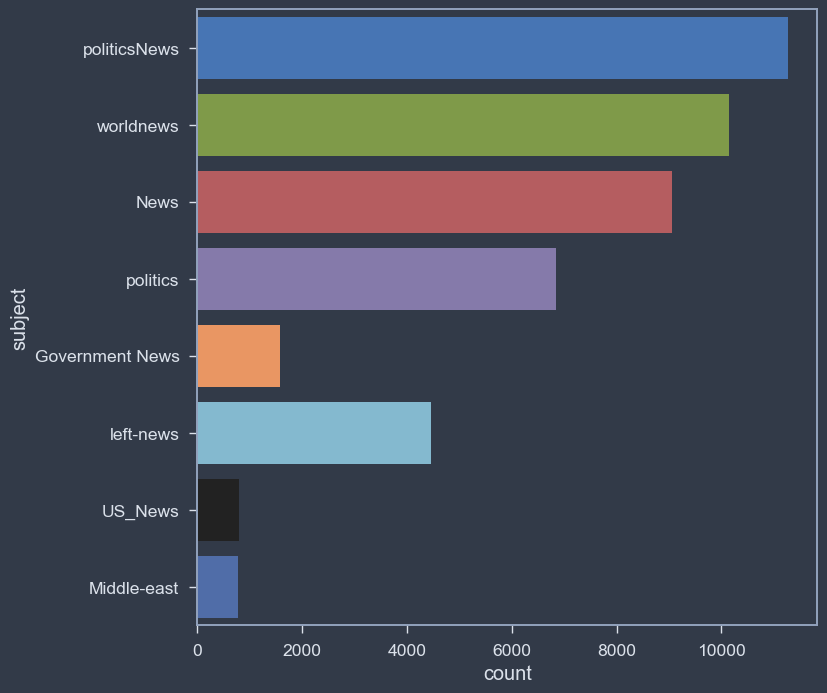

In [39]:
# Plotting the no of samples in 'subject'.
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

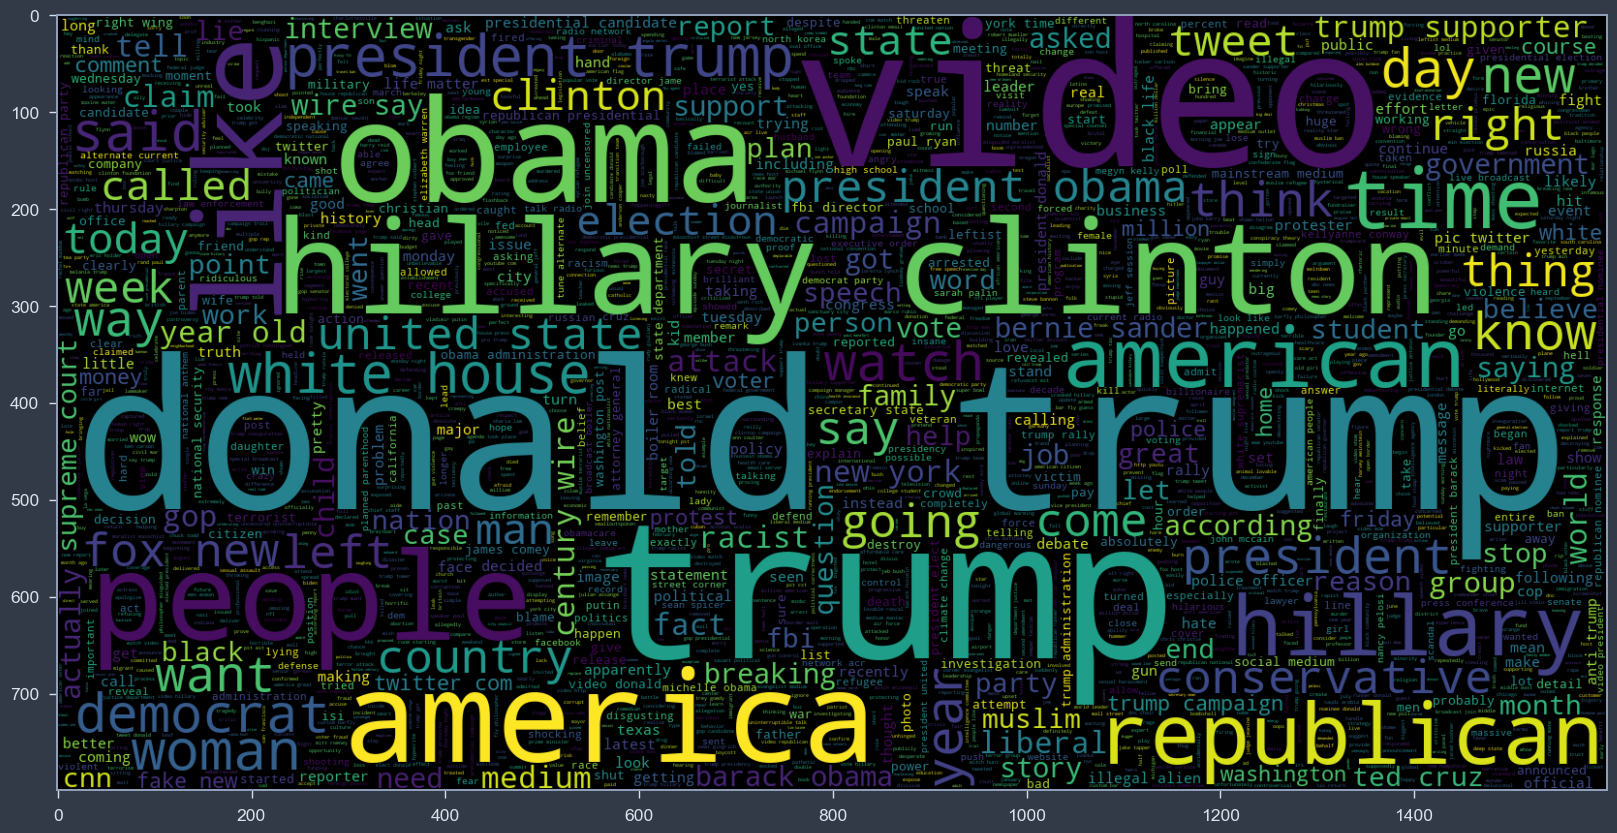

In [40]:
# Plotting the word cloud for text that is 'True/Real'.
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

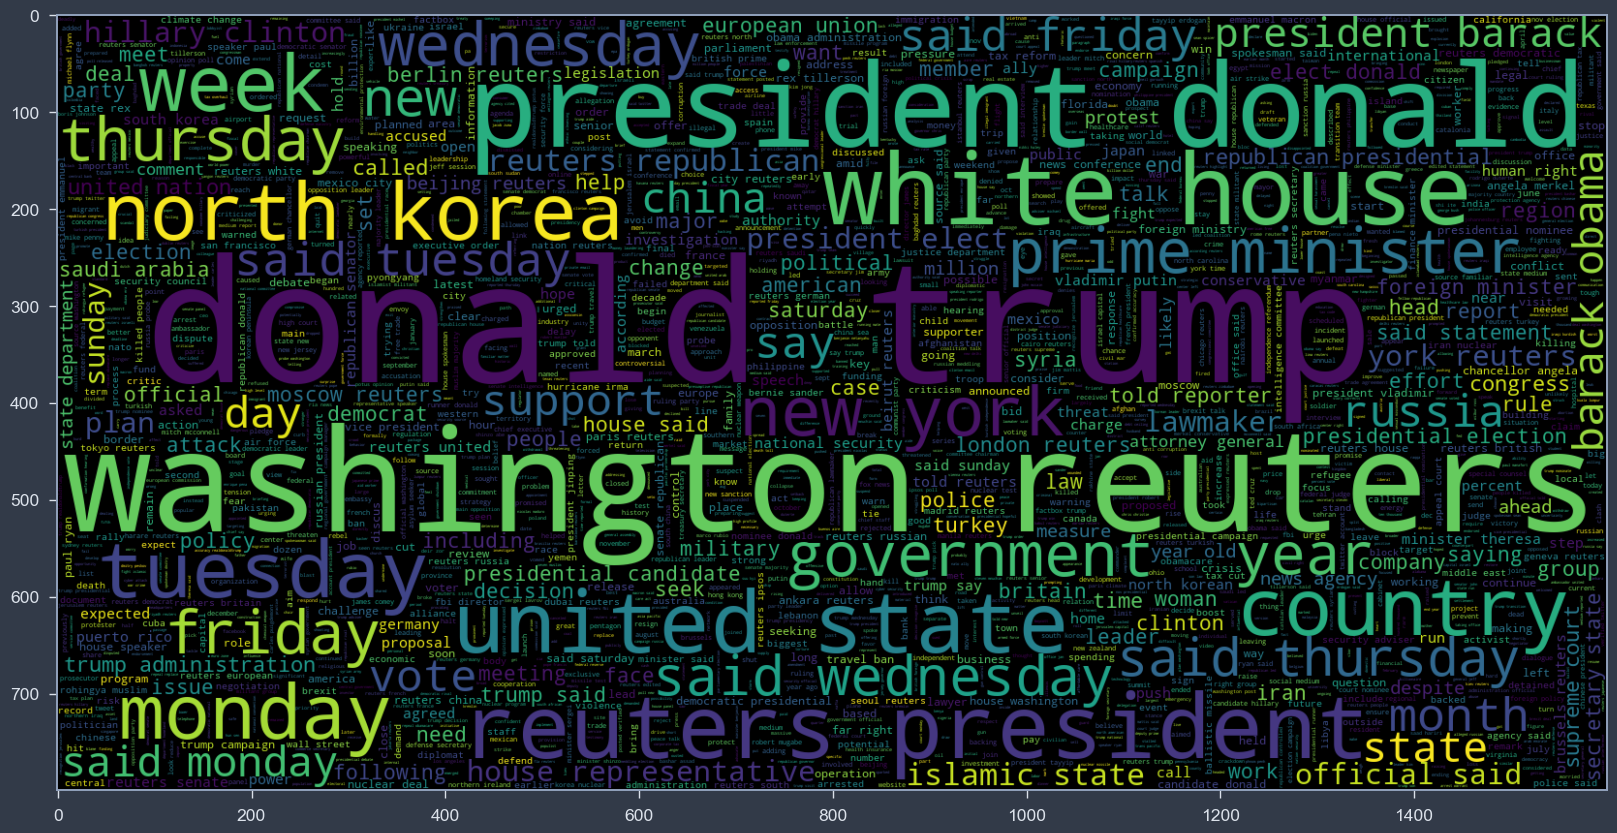

In [41]:
# Plotting the word cloud for text that is 'Fake'.
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [42]:
# Length of maximum document will be needed to create word embeddings.
maxlen = -1

for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
        
print("The maximum number of words in any document is: ", maxlen)

The maximum number of words in any document is:  49


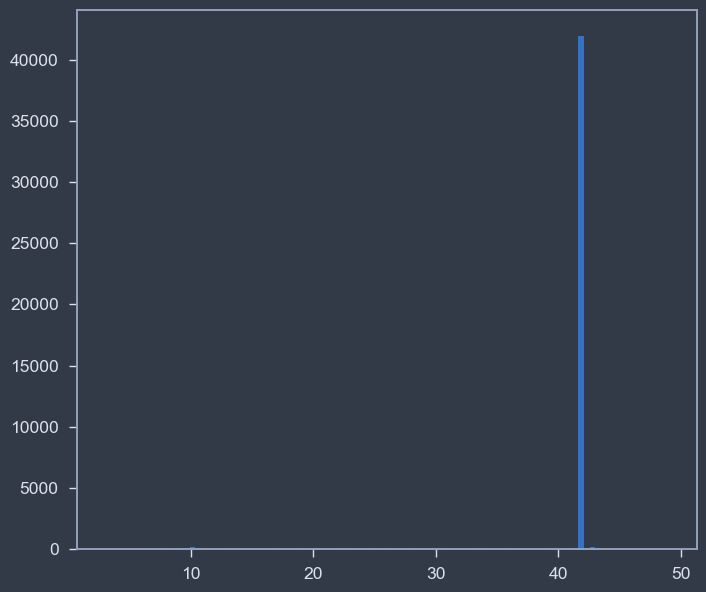

In [43]:
# Visualizing the distribution of no of words in a text.
import matplotlib.pyplot as plt
plt.hist([len(nltk.word_tokenize(x)) for x in df.clean_joined], bins=100)
plt.show()

## Performing Tokenization and Padding. 

In [44]:
# Spliting the data into training, vaidation and testing.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2, shuffle = True)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.2, shuffle = True)

In [45]:
print("Training set: ", len(x_train))
print("Validation set: ", len(x_val))
print("Testing set: " , len(x_test))

Training set:  28734
Validation set:  7184
Testing set:  8980


In [46]:
from nltk import word_tokenize

In [47]:
# Creating a tokenizer to tokenize the words and create sequences.
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [48]:
len(train_sequences)

28734

In [49]:
len(test_sequences)

8980

In [50]:
print("The encoding for the document:\n'",df.clean_joined[0],"' is: \n",train_sequences[0])

The encoding for the document:
' budget fight loom republican flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt pay tax cut called fiscal conservative sunday urged budget restraint keeping sharp pivot way republican representative mark meadow speaking cbs face nation ' is: 
 [1, 9, 248, 93, 400, 8, 1707, 860, 51, 276, 4553, 5495, 2333, 3, 9, 429, 7375, 102, 530, 643, 4554, 4235, 7696, 64, 126, 377, 40, 9, 1116, 151, 6845, 1, 2583, 124, 23, 129, 9, 1224, 4395, 689, 1821, 124]


In [51]:
# Zero-padding each sequence to make its max sequence length 42.
maxlen = 42  
padded_train = pad_sequences(train_sequences, maxlen=maxlen, padding='post', truncating='post')
padded_test = pad_sequences(test_sequences, maxlen=maxlen, padding='post', truncating='post')

## Training the Model.

In [52]:
# Sequential model.
model = Sequential()

# Embeddidng layer; converts the sequence into a distributed representation.
model.add(Embedding(total_words, output_dim = 128))

# Bi-Directional LSTM.
model.add(Bidirectional(LSTM(128)))

# Dense layers.
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
total_words

38396

In [54]:
y_train = np.asarray(y_train)

In [55]:
# Training the model; the validation set will be set to 16%.
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.16, epochs = 2)

Epoch 1/2
378/378 ━━━━━━━━━━━━━━━━━━━━ 55s 122ms/step - acc: 0.9389 - loss: 0.1323 - val_acc: 0.9978 - val_loss: 0.0124
Epoch 2/2
378/378 ━━━━━━━━━━━━━━━━━━━━ 44s 116ms/step - acc: 0.9991 - loss: 0.0052 - val_acc: 0.9980 - val_loss: 0.0127


## Performance for the Trained Model.

In [56]:
# Making prediction.
pred = model.predict(padded_test)

281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


In [57]:
# If predicted value is greater than '0.5', then the news is 'REAL' (or 'TRUE') else it is 'FAKE'.
prediction = []

for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
        
    else:
        prediction.append(0)

In [58]:
# Getting the model accuracy.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.9983296213808464


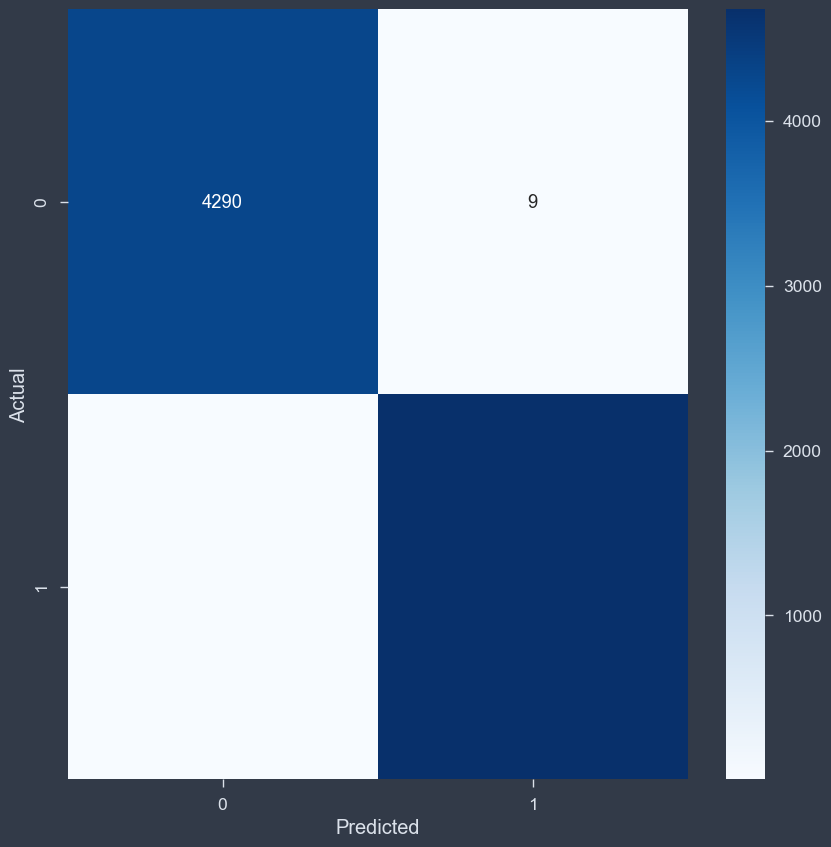

In [59]:
# Getting the confusion matrix.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Category dictionary.
category = { 0: 'Fake News', 1 : "Real News"}

In [71]:
import pickle

# Save model architecture to a file using pickle
with open("model_architecture.pkl", "wb") as f:
    pickle.dump(model.to_json(), f)

In [73]:
# Save model weights to a file
model.save_weights("model_weights.weights.h5")


In [83]:
from tensorflow.keras.models import model_from_json

# Load model architecture from file
with open("model_architecture.pkl", "rb") as f:
    model_architecture_json = pickle.load(f)

# Reconstruct model from architecture
reconstructed_model = model_from_json(model_architecture_json)


In [ ]:
import pandas as pd
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import model_from_json

# Load fake and true news datasets
fake_df = pd.read_csv("C:\\Users\\sivan\\Desktop\\fake news detection\\Fake.csv")
true_df = pd.read_csv("C:\\Users\\sivan\\Desktop\\fake news detection\\True.csv")

# Concatenate fake and true news data
news_data = pd.concat([fake_df["text"], true_df["text"]], ignore_index=True)

# Maximum number of words to tokenize
MAX_WORDS = 10000
# Maximum sequence length for padding
MAX_SEQUENCE_LENGTH = 100

# Fit tokenizer on concatenated news data
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(news_data)

# Load model architecture from file
with open("model_architecture.pkl", "rb") as f:
    model_architecture_json = pickle.load(f)

# Reconstruct model from architecture
reconstructed_model = model_from_json(model_architecture_json)

# Function to preprocess input text and make predictions
def predict_news(news):
    # Tokenize and pad the input text
    tokenized_text = tokenizer.texts_to_sequences([news])
    padded_text = pad_sequences(tokenized_text, maxlen=MAX_SEQUENCE_LENGTH)

    # Make predictions with the model
    prediction = reconstructed_model.predict(padded_text)[0]
    
    # Map prediction to label
    label = "Fake" if prediction < 0.5 else "True"

    return label

# Create a Gradio interface
iface = gr.Interface(fn=predict_news, inputs="text", outputs="text", title="News Veracity Predictor")
iface.launch()


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
